In [1]:
%run 'lib.ipynb'
%run 'data-generator.ipynb'

In [2]:
dg = DataGenerator('/d2/caches/tf-speech/train/audio')
dg.n_mels = 64
dg.msg_w = 64

file /d2/caches/tf-speech/train/audio/left/da584bc0_nohash_4.wav
mixing with /d2/caches/tf-speech/train/audio/_background_noise_/running_tap.wav at 0.55 vol
mixing with /d2/caches/tf-speech/train/audio/_background_noise_/dude_miaowing.wav at 0.37 vol
transforming pitch 5.201496906322307
left


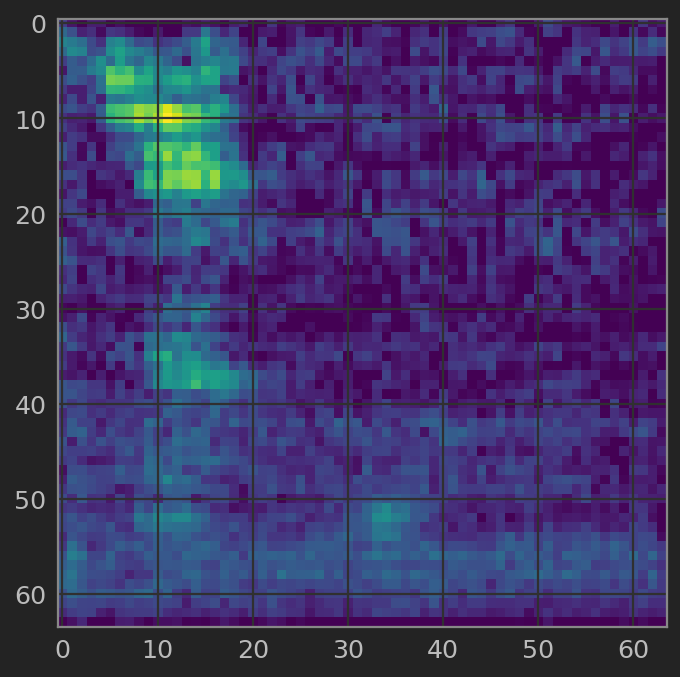

In [3]:
# try generating gen audio
dg.debug = True
a, a_label = dg.generate_audio()
print(a_label)
a_msg = dg.msg(a)
plt.imshow(a_msg)
ipd.Audio(a, rate=16000)

In [ ]:
# try mixing with noise
sr, s = wavfile.read(
    '/d2/caches/tf-speech/train/audio/go/4c4d2526_nohash_1.wav')
n = dg._load_random_segment(
    '/d2/caches/tf-speech/train/audio/_background_noise_/pink_noise.wav'
)[:len(s)]
s = dg.mix(s, 1., n, 0.05)
ipd.Audio(s, rate=sr)

In [8]:
# benchmark
from tqdm import tqdm
from collections import Counter
dg.debug = False
labels = Counter()

for i in tqdm(range(1000)):
    w, label = dg.generate_audio()
    labels[label] += 1

labels

100%|██████████| 1000/1000 [00:12<00:00, 78.05it/s]


Counter({'down': 86,
         'go': 74,
         'left': 92,
         'no': 83,
         'off': 76,
         'on': 82,
         'right': 89,
         'silence': 71,
         'stop': 96,
         'unknown': 92,
         'up': 76,
         'yes': 83})

(array([ 1482.,  1327.,   827.,   240.,    90.,    50.,    34.,    25.,
           18.,     3.]),
 array([ 103.32276917,  111.32276917,  119.32276917,  127.32276917,
         135.32276917,  143.32276917,  151.32276917,  159.32276917,
         167.32276917,  175.32276917,  183.32276917]),
 <a list of 10 Patch objects>)

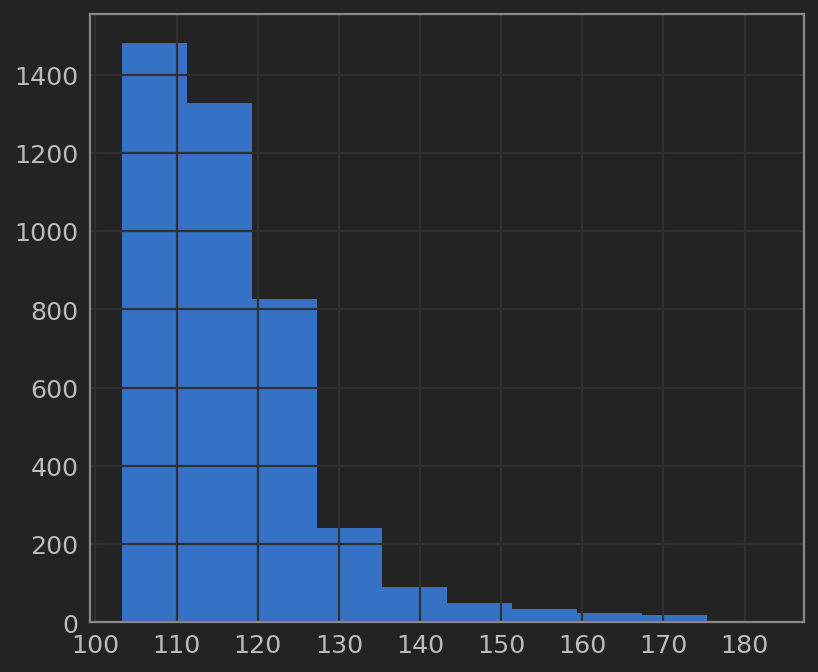

In [5]:
plt.hist(a_msg.flatten())

In [4]:
dg.debug = False
dg.compute_msg_norm_params(500)

In [6]:
a_msg_norm = dg.normalize_msg(a_msg)

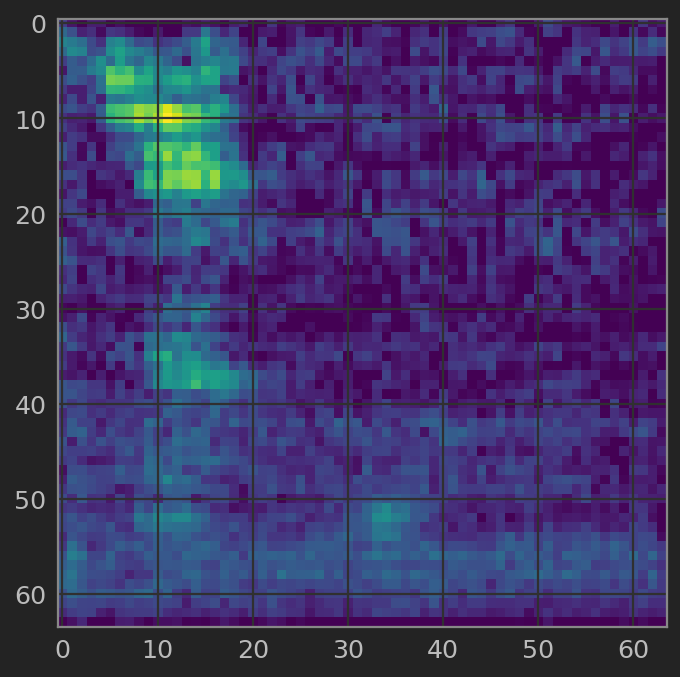

In [7]:
plt.imshow(a_msg_norm)

(array([ 1482.,  1327.,   827.,   240.,    90.,    50.,    34.,    25.,
           18.,     3.]),
 array([-1.16048312, -0.44625037,  0.26798239,  0.98221514,  1.6964479 ,
         2.41068065,  3.12491341,  3.83914616,  4.55337892,  5.26761167,
         5.98184443]),
 <a list of 10 Patch objects>)

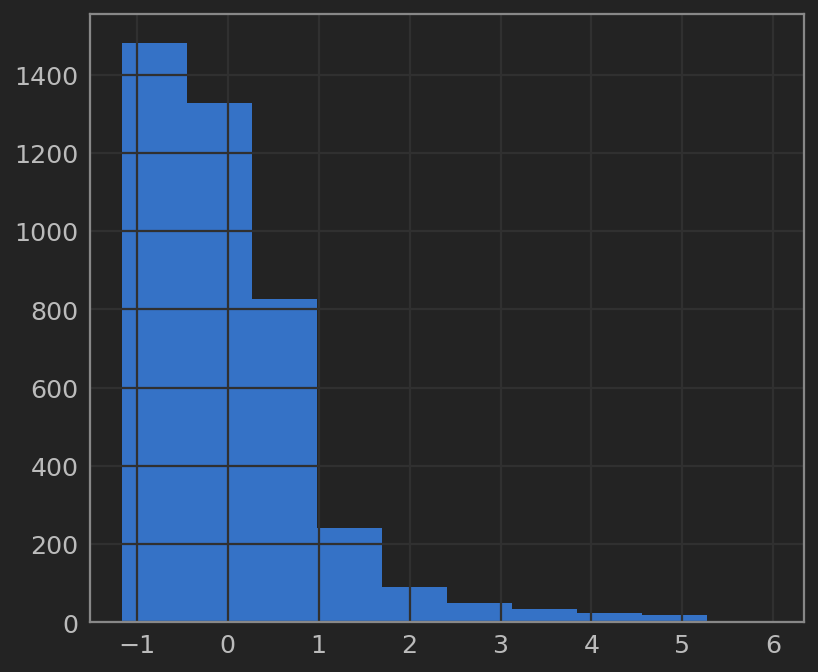

In [8]:
plt.hist(a_msg.flatten())